In [1]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('data/20230413_clb_taps.csv')
# df['Datetime'] = pd.to_datetime(df['Datetime'])
# entry_df = df.set_index('Datetime')
# entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
# entry_df.columns = ['timestamp', 'entry_counts']
# entry_df

In [3]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [4]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

In [5]:
model = LibModel(df, lib_graph)
model.run()
results = model.datacollector.get_model_vars_dataframe()
# results['timestamp'] = entry_df['timestamp']
# sns.lineplot(results, x='timestamp', y='num_agents')

<AxesSubplot: >

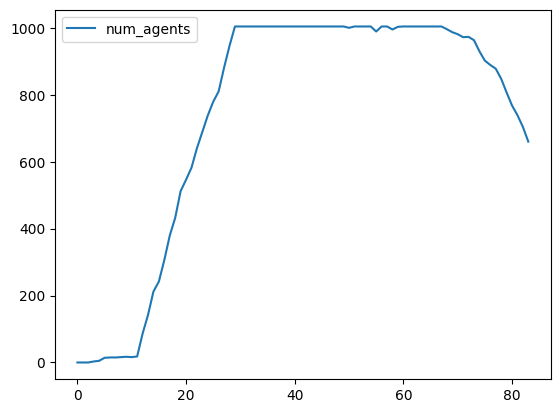

In [6]:
sns.lineplot(results)

In [7]:
results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,seat_type,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,movable_seat,150.0,150.0,0.000000
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,4_man_seat,0.0,0.0,NaN
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,8_man_seat,0.0,0.0,NaN
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,window_seat,20.0,20.0,0.000000
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,sofa,0.0,0.0,NaN
...,...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,sofa,0.0,0.0,NaN
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,soft_seat,0.0,0.0,NaN
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,cubicle,20.0,1.0,0.950000
3778,2023-04-13 12:40:00+00:00,wbs_6-d_cubicle,wbs_6,d_cubicle,0.0,0.0,NaN


In [8]:
results2['section'].unique()

array(['clb_3-movable_seat', 'clb_3-4_man_seat', 'clb_3-8_man_seat',
       'clb_3-window_seat', 'clb_3-sofa', 'clb_3-soft_seat',
       'clb_3-cubicle', 'clb_3-d_cubicle', 'clb_3-diagonal_seat',
       'clb_4-movable_seat', 'clb_4-4_man_seat', 'clb_4-8_man_seat',
       'clb_4-window_seat', 'clb_4-sofa', 'clb_4-soft_seat',
       'clb_4-cubicle', 'clb_4-d_cubicle', 'clb_4-diagonal_seat',
       'clb_5-movable_seat', 'clb_5-4_man_seat', 'clb_5-8_man_seat',
       'clb_5-window_seat', 'clb_5-sofa', 'clb_5-soft_seat',
       'clb_5-cubicle', 'clb_5-d_cubicle', 'clb_5-diagonal_seat',
       'clb_6-movable_seat', 'clb_6-4_man_seat', 'clb_6-8_man_seat',
       'clb_6-window_seat', 'clb_6-sofa', 'clb_6-soft_seat',
       'clb_6-cubicle', 'clb_6-d_cubicle', 'clb_6-diagonal_seat',
       'wbs_6-movable_seat', 'wbs_6-4_man_seat', 'wbs_6-8_man_seat',
       'wbs_6-window_seat', 'wbs_6-sofa', 'wbs_6-soft_seat',
       'wbs_6-cubicle', 'wbs_6-d_cubicle', 'wbs_6-diagonal_seat'],
      dtype=object)

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

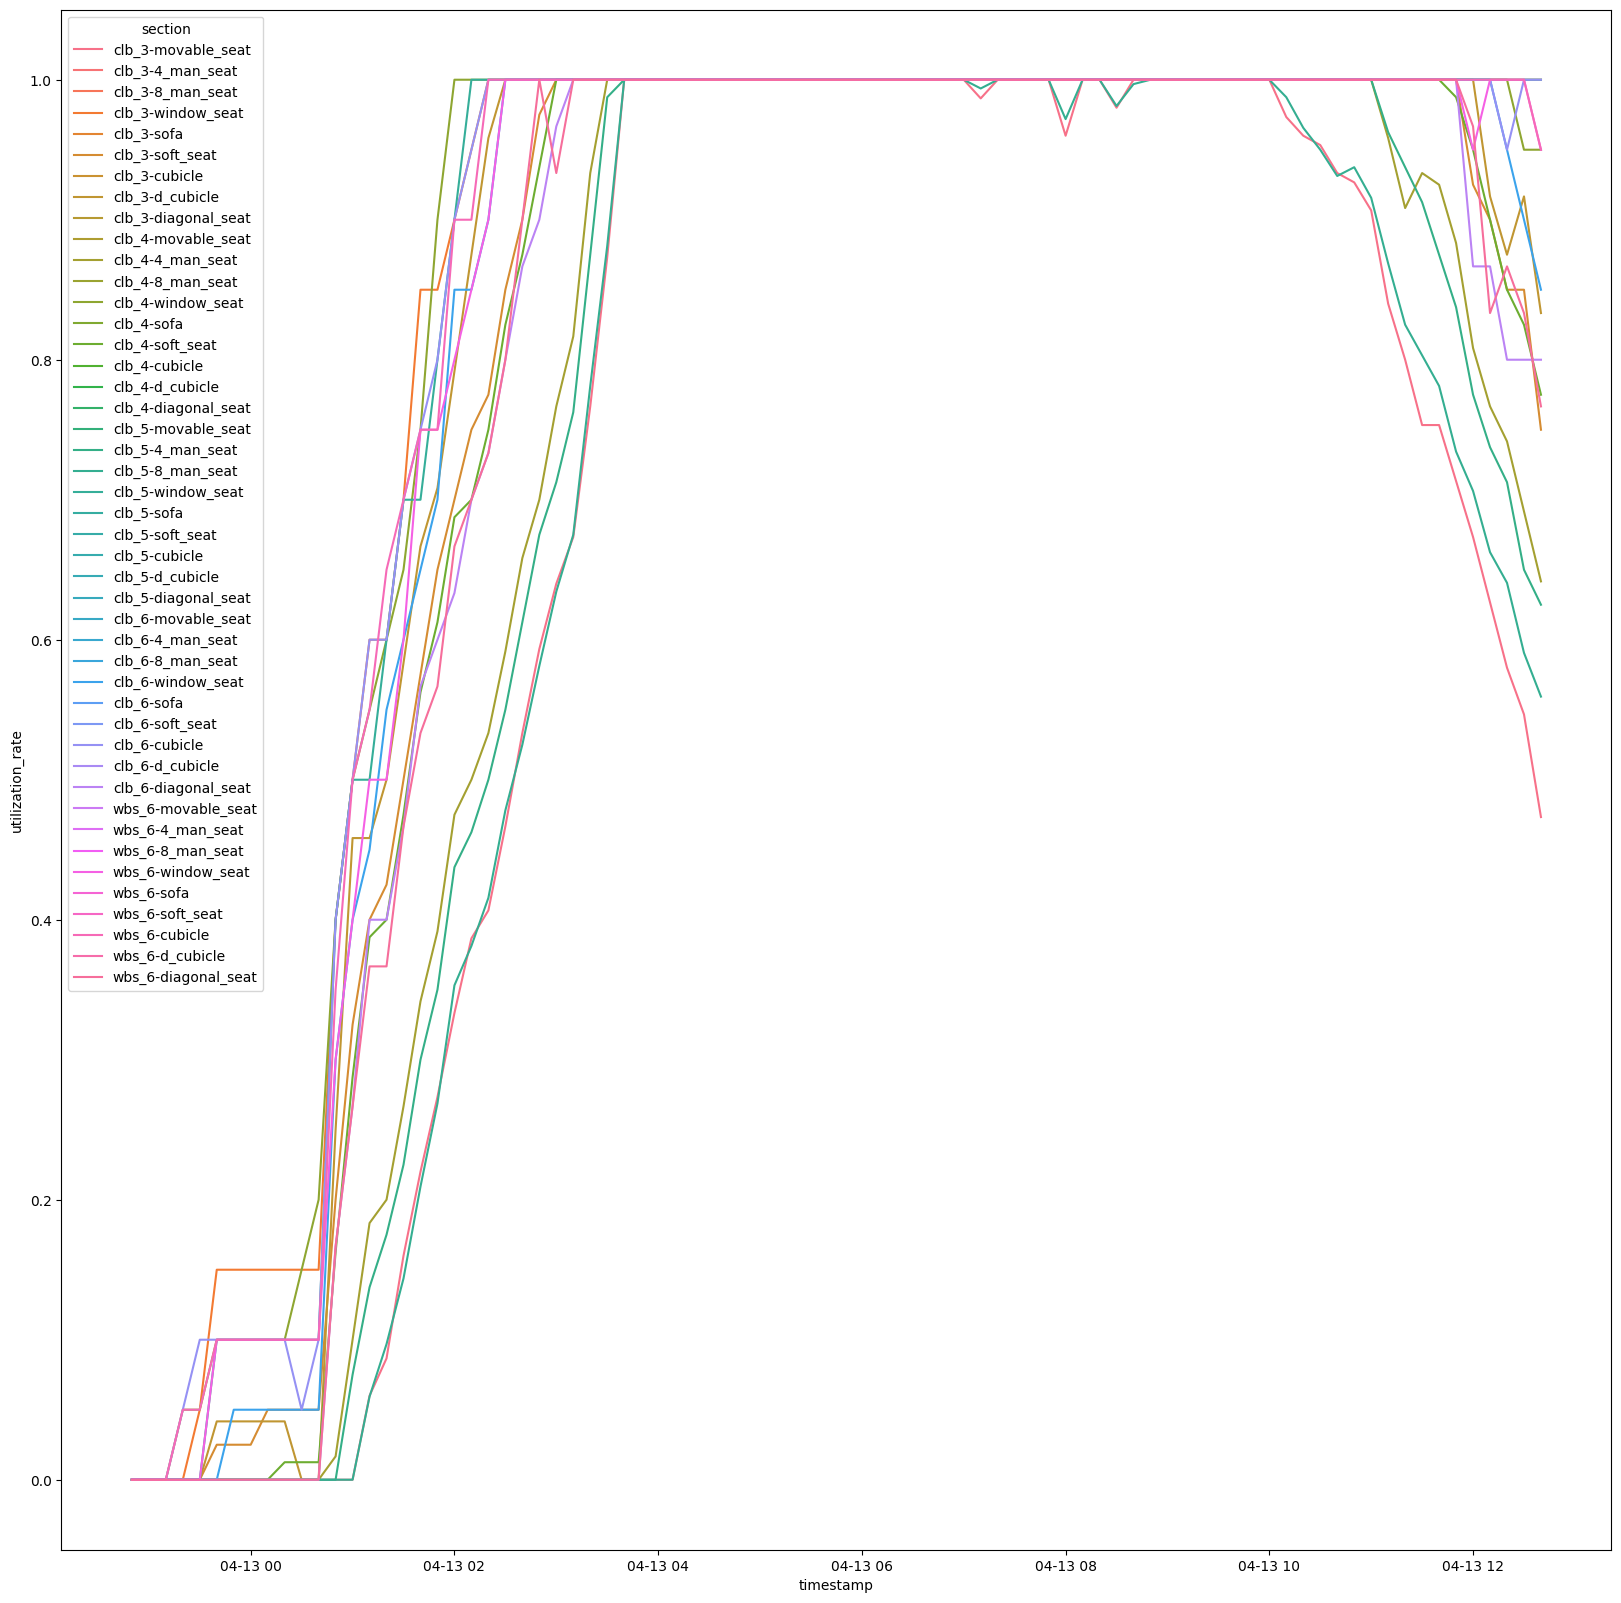

In [9]:
plt.figure(figsize=(20,20))
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='section')

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

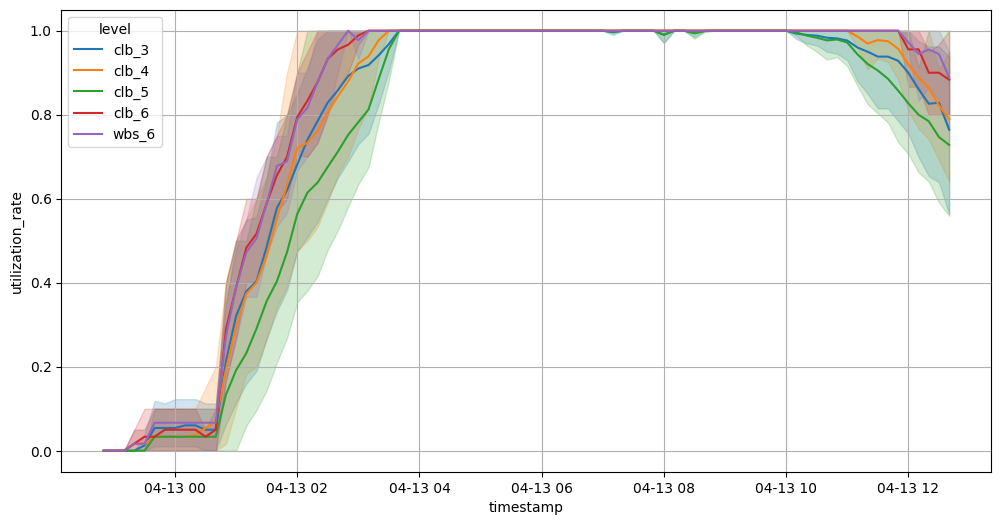

In [18]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='level')

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

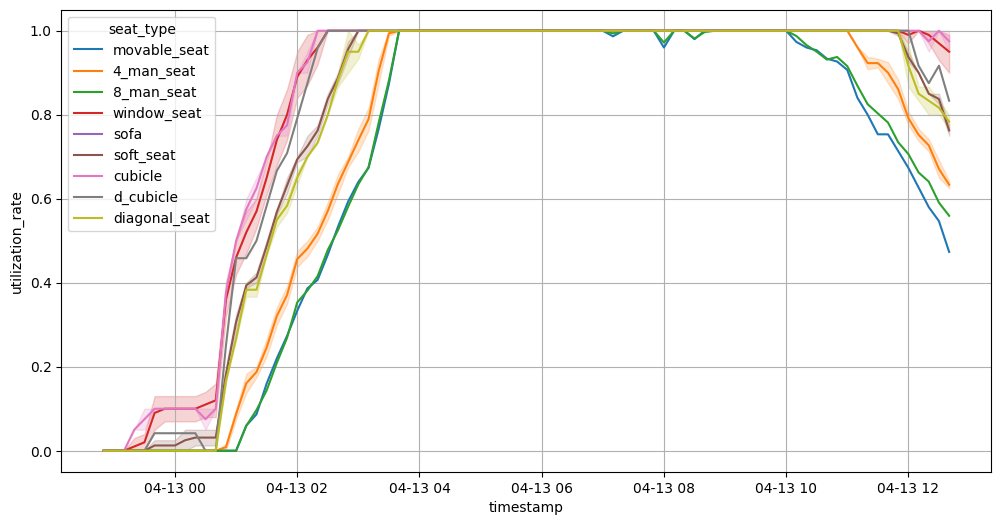

In [19]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='seat_type')

In [11]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                                 
3    3-0          clb_6-cubicle      3.547777
     3-1      clb_4-window_seat      3.493546
     3-2          wbs_6-cubicle      3.670146
4    3-0          clb_6-cubicle      3.547777
     3-1      clb_4-window_seat      3.493546
...                         ...           ...
83   83-0       clb_3-d_cubicle      2.739108
     83-1      clb_5-4_man_seat      2.668046
     83-2     clb_4-window_seat      2.875399
     83-3       clb_3-d_cubicle      2.664022
     83-4     clb_3-window_seat      2.666445

[62165 rows x 2 columns]

<AxesSubplot: xlabel='Step', ylabel='satisfaction'>

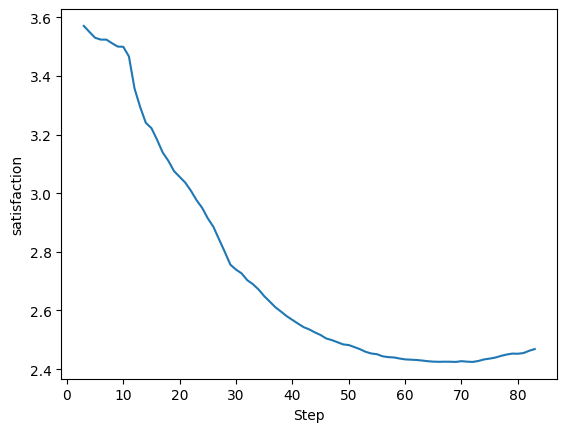

In [26]:
sns.lineplot(agents.reset_index().groupby('Step')['satisfaction'].mean().reset_index(), x='Step', y='satisfaction')

In [12]:
agents['satisfaction'].describe()

count    62165.000000
mean         2.575171
std          0.322535
min          1.854113
25%          2.324696
50%          2.520067
75%          2.776804
max          3.827182
Name: satisfaction, dtype: float64

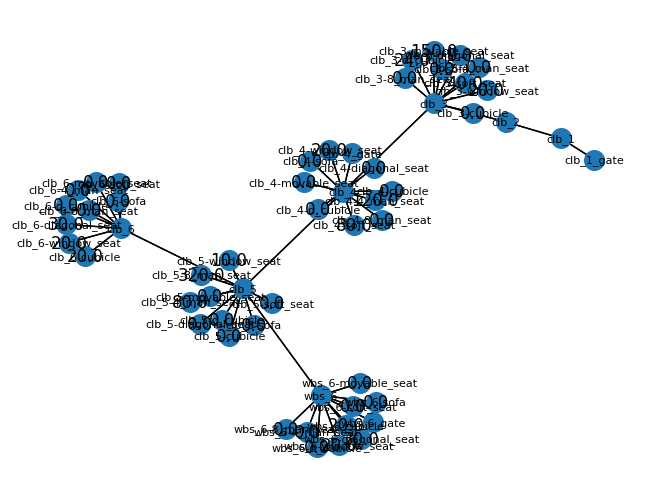

{'clb_3-movable_seat': 150.0,
 'clb_3-4_man_seat': 0.0,
 'clb_3-8_man_seat': 0.0,
 'clb_3-window_seat': 20.0,
 'clb_3-sofa': 0.0,
 'clb_3-soft_seat': 40.0,
 'clb_3-cubicle': 0.0,
 'clb_3-d_cubicle': 24.0,
 'clb_3-diagonal_seat': 0.0,
 'clb_4-movable_seat': 0.0,
 'clb_4-4_man_seat': 120.0,
 'clb_4-8_man_seat': 0.0,
 'clb_4-window_seat': 20.0,
 'clb_4-sofa': 0.0,
 'clb_4-soft_seat': 80.0,
 'clb_4-cubicle': 0.0,
 'clb_4-d_cubicle': 0.0,
 'clb_4-diagonal_seat': 0.0,
 'clb_5-movable_seat': 0.0,
 'clb_5-4_man_seat': 80.0,
 'clb_5-8_man_seat': 320.0,
 'clb_5-window_seat': 10.0,
 'clb_5-sofa': 0.0,
 'clb_5-soft_seat': 0.0,
 'clb_5-cubicle': 0.0,
 'clb_5-d_cubicle': 0.0,
 'clb_5-diagonal_seat': 0.0,
 'clb_6-movable_seat': 0.0,
 'clb_6-4_man_seat': 0.0,
 'clb_6-8_man_seat': 0.0,
 'clb_6-window_seat': 20.0,
 'clb_6-sofa': 0.0,
 'clb_6-soft_seat': 0.0,
 'clb_6-cubicle': 20.0,
 'clb_6-d_cubicle': 0.0,
 'clb_6-diagonal_seat': 30.0,
 'wbs_6-movable_seat': 0.0,
 'wbs_6-4_man_seat': 0.0,
 'wbs_6-8_man_

In [13]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities